In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
A = pd.read_csv('Kopplade pendlar A.csv', delimiter=';', decimal=',')
B = pd.read_csv('Kopplade pendlar B.csv', delimiter=';', decimal=',')
C = pd.read_csv('Kopplade pendlar C.csv', delimiter=';', decimal=',')

In [4]:
runs = ('1','2','3')

for run in runs:
    mean_ch1 = A['Angle, Ch 1 (rad) Run #'+run].mean()
    mean_ch2 = A['Angle, Ch 2 (rad) Run #'+run].mean()
    A['Angle, Ch 1 (rad) Run #'+run] -= mean_ch1
    A['Angle, Ch 2 (rad) Run #'+run] -= mean_ch2

for run in runs:
    mean_ch1 = B['Angle, Ch 1 (rad) Run #'+run].mean()
    mean_ch2 = B['Angle, Ch 2 (rad) Run #'+run].mean()
    B['Angle, Ch 1 (rad) Run #'+run] -= mean_ch1
    B['Angle, Ch 2 (rad) Run #'+run] -= mean_ch2

for run in runs:
    mean_ch1 = C['Angle, Ch 1 (rad) Run #'+run].mean()
    mean_ch2 = C['Angle, Ch 2 (rad) Run #'+run].mean()
    C['Angle, Ch 1 (rad) Run #'+run] -= mean_ch1
    C['Angle, Ch 2 (rad) Run #'+run] -= mean_ch2



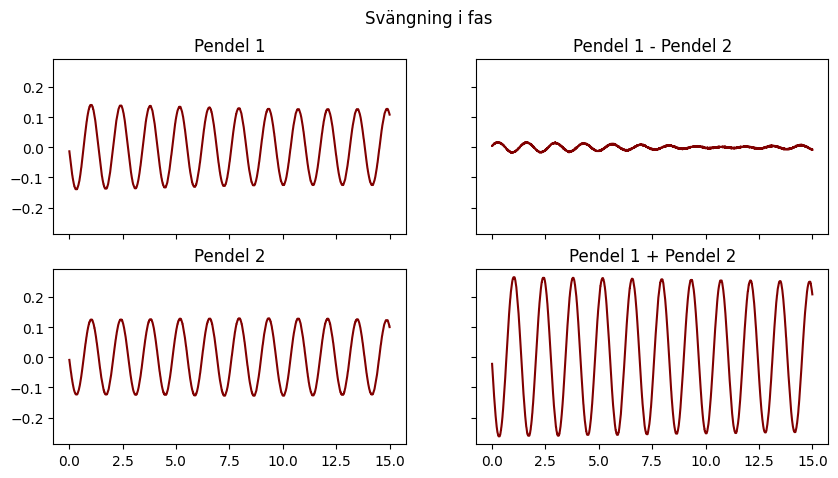

In [5]:
run = '3'
st = 0
et = 15*200

fig, ax = plt.subplots(2,2, sharey=True, sharex=True, figsize=(10,5))   

ax[0,0].plot(A['Time (s) Run #'+run][st:et], A['Angle, Ch 2 (rad) Run #'+run][st:et], color='maroon')
ax[1,0].plot(A['Time (s) Run #'+run][st:et], A['Angle, Ch 1 (rad) Run #'+run][st:et], color='maroon')
ax[0,1].plot(A['Time (s) Run #'+run][st:et], A['Angle, Ch 1 (rad) Run #'+run][st:et] - A['Angle, Ch 2 (rad) Run #'+run][st:et], color='maroon')
ax[1,1].plot(A['Time (s) Run #'+run][st:et], A['Angle, Ch 1 (rad) Run #'+run][st:et] + A['Angle, Ch 2 (rad) Run #'+run][st:et], color='maroon')
fig.suptitle('Svängning i fas')
ax[0,0].set_title('Pendel 1')
ax[1,0].set_title('Pendel 2')
ax[0,1].set_title('Pendel 1 - Pendel 2')
ax[1,1].set_title('Pendel 1 + Pendel 2')
fig.savefig('Svängning i fas.png')


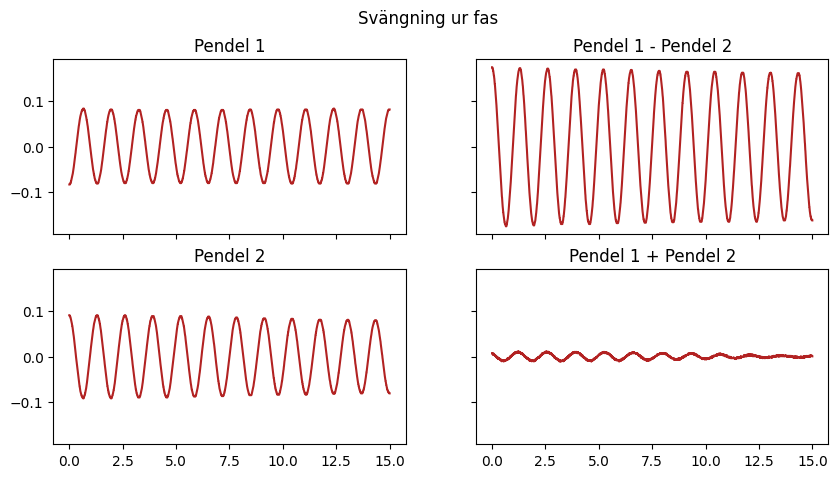

In [ ]:
run = '3'
st = 0
et = 15*200

fig, ax = plt.subplots(2,2, sharey=True, sharex=True,figsize=(10,5))   

ax[0,0].plot(B['Time (s) Run #'+run][st:et], B['Angle, Ch 2 (rad) Run #'+run][st:et], color='firebrick')
ax[1,0].plot(B['Time (s) Run #'+run][st:et], B['Angle, Ch 1 (rad) Run #'+run][st:et], color='firebrick')
ax[0,1].plot(B['Time (s) Run #'+run][st:et], B['Angle, Ch 1 (rad) Run #'+run][st:et] - B['Angle, Ch 2 (rad) Run #'+run][st:et], color='firebrick')
ax[1,1].plot(B['Time (s) Run #'+run][st:et], B['Angle, Ch 1 (rad) Run #'+run][st:et] + B['Angle, Ch 2 (rad) Run #'+run][st:et], color='firebrick')
fig.suptitle('Svängning ur fas')
ax[0,0].set_title('Pendel 1')
ax[1,0].set_title('Pendel 2')
ax[0,1].set_title('Pendel 1 - Pendel 2')
ax[1,1].set_title('Pendel 1 + Pendel 2')
fig.savefig('Svängning ur fas.png')


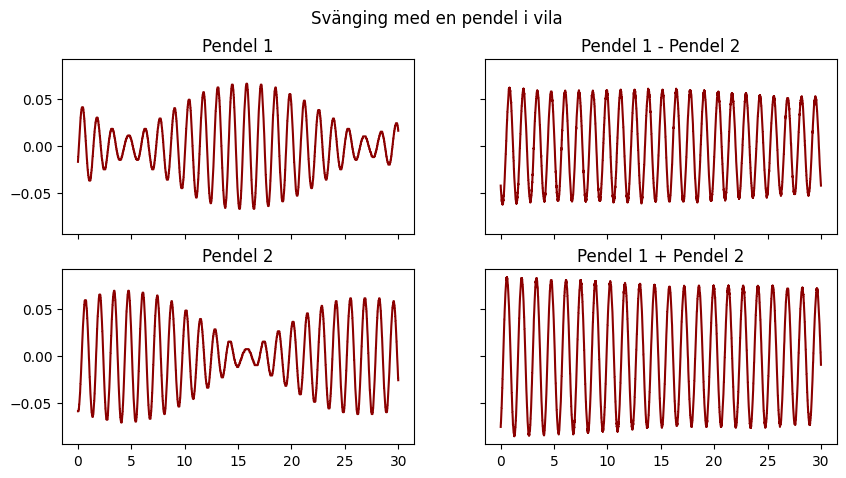

In [ ]:
run = '3'
st = 0
et = 30*200

fig, ax = plt.subplots(2,2, sharey=True, sharex=True, figsize=(10,5))   

ax[0,0].plot(C['Time (s) Run #'+run][st:et], C['Angle, Ch 2 (rad) Run #'+run][st:et], color='darkred')
ax[1,0].plot(C['Time (s) Run #'+run][st:et], C['Angle, Ch 1 (rad) Run #'+run][st:et], color='darkred')
ax[0,1].plot(C['Time (s) Run #'+run][st:et], C['Angle, Ch 1 (rad) Run #'+run][st:et] - C['Angle, Ch 2 (rad) Run #'+run][st:et], color='darkred')
ax[1,1].plot(C['Time (s) Run #'+run][st:et], C['Angle, Ch 1 (rad) Run #'+run][st:et] + C['Angle, Ch 2 (rad) Run #'+run][st:et], color='darkred')
fig.suptitle('Svänging med en pendel i vila')
ax[0,0].set_title('Pendel 1')
ax[1,0].set_title('Pendel 2')
ax[0,1].set_title('Pendel 1 - Pendel 2')
ax[1,1].set_title('Pendel 1 + Pendel 2')
fig.savefig('Svänging med en pendel i vila.png')


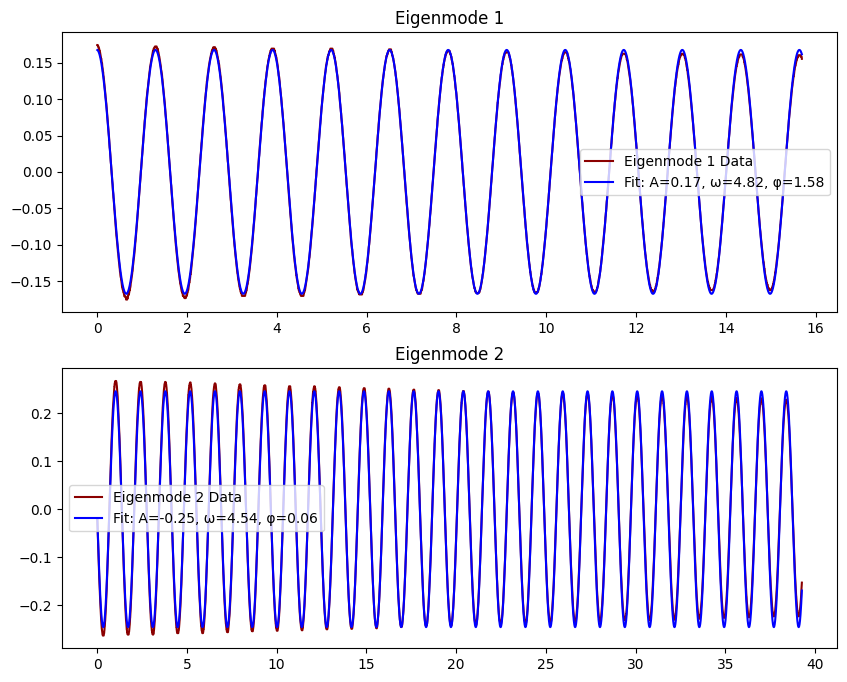

Eigenmode 1 Fit Parameters:
Amplitude: 0.17
Angular Velocity: 4.82
Phase Shift: 1.58
Eigenmode 2 Fit Parameters:
Amplitude: -0.25
Angular Velocity: 4.54
Phase Shift: 0.06
Eigenmode 1 Fit Parameter Errors:
Amplitude Error: 0.00
Angular Velocity Error: 0.00
Phase Shift Error: 0.00
Eigenmode 2 Fit Parameter Errors:
Amplitude Error: 0.00
Angular Velocity Error: 0.00
Phase Shift Error: 0.00


In [43]:
from scipy.optimize import curve_fit
from numpy import sqrt, diag

run = '3'

eigenmode1 = B['Angle, Ch 1 (rad) Run #'+run] - B['Angle, Ch 2 (rad) Run #'+run]
eigenmode2 = A['Angle, Ch 1 (rad) Run #'+run] + A['Angle, Ch 2 (rad) Run #'+run]
timeA = A['Time (s) Run #'+run]
timeB = B['Time (s) Run #'+run]

# Remove NaN values
mask1 = ~np.isnan(timeB) & ~np.isnan(eigenmode1)
mask2 = ~np.isnan(timeA) & ~np.isnan(eigenmode2)

timeB_clean = timeB[mask1]
eigenmode1_clean = eigenmode1[mask1]
timeA_clean = timeA[mask2]
eigenmode2_clean = eigenmode2[mask2]

def wave_function(t, A, omega, phi):
    return A * np.sin(omega * t + phi)

params1, _ = curve_fit(wave_function, timeB_clean, eigenmode1_clean, p0=[0.2, 5, 0])
params2, _ = curve_fit(wave_function, timeA_clean, eigenmode2_clean, p0=[0.3, 4.5, 0])

fig, ax = plt.subplots(2, 1, figsize=(10, 8))

ax[0].plot(timeB_clean, eigenmode1_clean, label='Eigenmode 1 Data', color='darkred')
ax[0].plot(timeB_clean, wave_function(timeB_clean, *params1), label='Fit: A=%.2f, ω=%.2f, φ=%.2f' % tuple(params1), color='blue')
ax[0].set_title('Eigenmode 1')
ax[0].legend()

ax[1].plot(timeA_clean, eigenmode2_clean, label='Eigenmode 2 Data', color='darkred')
ax[1].plot(timeA_clean, wave_function(timeA_clean, *params2), label='Fit: A=%.2f, ω=%.2f, φ=%.2f' % tuple(params2), color='blue')
ax[1].set_title('Eigenmode 2')
ax[1].legend()

plt.show()

print(f"Eigenmode 1 Fit Parameters:\nAmplitude: {params1[0]:.2f}\nAngular Velocity: {params1[1]:.2f}\nPhase Shift: {params1[2]:.2f}")
print(f"Eigenmode 2 Fit Parameters:\nAmplitude: {params2[0]:.2f}\nAngular Velocity: {params2[1]:.2f}\nPhase Shift: {params2[2]:.2f}")
# Calculate the errors in the fit parameters
errors1 = sqrt(diag(_))
errors2 = sqrt(diag(_))

print(f"Eigenmode 1 Fit Parameter Errors:\nAmplitude Error: {errors1[0]:.2f}\nAngular Velocity Error: {errors1[1]:.2f}\nPhase Shift Error: {errors1[2]:.2f}")
print(f"Eigenmode 2 Fit Parameter Errors:\nAmplitude Error: {errors2[0]:.2f}\nAngular Velocity Error: {errors2[1]:.2f}\nPhase Shift Error: {errors2[2]:.2f}")

Slope: 3.090448418084076
Slope Uncertainty: 0.34569764963475247


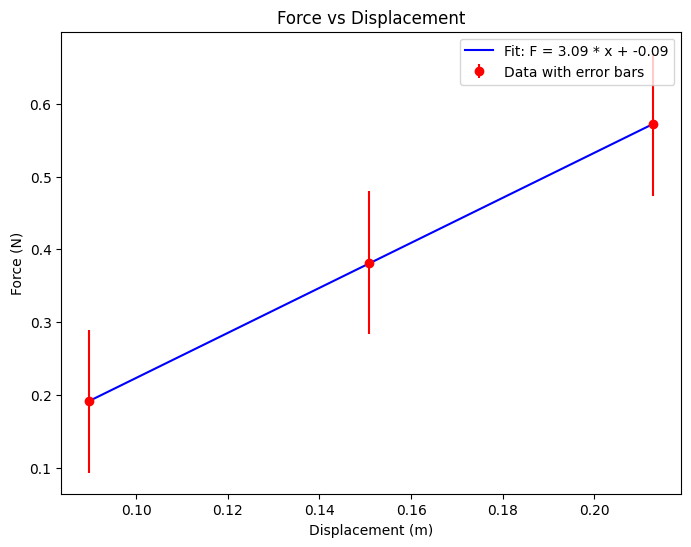

In [42]:
mass = np.array([19.51, 38.84, 58.22])
length = np.array([186, 247, 309])
g = 9.82
l0 = 96.2
error_length = 0.5
error_mass = 0.01

displacement = length - l0

displacement = displacement / 1000
mass = mass / 1000
force = mass * g

slope, intercept = np.polyfit(displacement, force, 1)
print(f"Slope: {slope}")

error_force = force * np.sqrt((error_mass / mass)**2 + (error_length / length)**2)
slope_uncertainty = np.sqrt(np.sum((error_force / force)**2) / len(force))
print(f"Slope Uncertainty: {slope_uncertainty}")

plt.figure(figsize=(8, 6))
plt.errorbar(displacement, force, yerr=error_force, fmt='o', label='Data with error bars', color='red')
plt.plot(displacement, slope * displacement + intercept, label='Fit: F = %.2f * x + %.2f' % (slope, intercept), color='blue')
plt.xlabel('Displacement (m)')
plt.ylabel('Force (N)')
plt.title('Force vs Displacement')
plt.legend()
plt.show()
